## Шаг 1: Загрузка данных и начальная информация о DataFrame

In [2]:
import pandas as pd 
df_train = pd.read_csv('data/train.csv',
                        dtype={'content_id': 'int16',
                               'content_type_id': 'int8',
                               'task_container_id': 'int16',
                               'user_answer': 'int8',
                               'answered_correctly': 'int8',
                               'prior_question_elapsed_time': 'float32'},
                        nrows=10000000)
# Загрузка данны train.csv
# в параметр dtype передаем типы данны которые будут раниться в соответствующи столбца 
# (по умолчанию read_csv будет присываивать общие типы данны для которы потребуется больше оперативной памяти)
# параметр nrows позваляет обрезать текущий датасет до 10^7 строк

In [3]:
# Смотрим на наш DataFrame (далее по тексту df)
# Смотрим на 5 первых строк
df_train.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [4]:
# Смотрим на 5 последних строк
df_train.tail()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
9999995,9999995,646228695,216747867,8805,0,410,1,1,23000.0,True
9999996,9999996,646321314,216747867,5708,0,411,0,0,13000.0,True
9999997,9999997,646393443,216747867,5434,0,412,0,0,66000.0,True
9999998,9999998,646445632,216747867,6429,0,413,3,1,37000.0,True
9999999,9999999,690225760,216747867,9010,0,414,2,1,16000.0,True


Это нужно для того чтобы первоначально оценить визуально структуру нашего датафрейма и понять что именно в нем содержится. 

In [5]:
# Смотрим размерность нашего df
df_train.shape

(10000000, 10)

**Что мы получаем из этих цифр?**
- первая цифра в выводе - означает количество строк в нашем df (в нашем случае это 10000000 строк).
- вторая цифра - означает количество столбцов в нашем df (в нашем случае это 10 столбцов).

In [6]:
# Смотрим информацию о нашем df
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  object 
dtypes: float32(1), int16(2), int64(3), int8(3), object(1)
memory usage: 410.1+ MB


Из этой информации мы можем 
- узнать какие типы данных у нас есть: у нас есть данные int (целочисленные значения), float (числа с плавающей точкой) и object (строки). 
- также можно узнать типы наших данных и сколько столбцов имеют те или иные типы (в нашем случае: float32(1), int16(2), int64(3), int8(3), object(1))
- Сколько памяти занимает наш df (в нашем случае: 410.1+ MB)

In [7]:
# Посмотреть на статистическое описание числовых данных в df
df_train.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547560e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.995033e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


Метод `describe()` автоматически вычисляет следующие метрики для всех числовых столбцов:
- `count` — количество ненулевых значений в каждом столбце.
- `mean` — среднее значение.
- `std` — стандартное отклонение.
- `min` — минимальное значение.
- `25%` — первый квартиль (25-й процентиль).
- `50%` — медиана (50-й процентиль).
- `75%` — третий квартиль (75-й процентиль).
- `max` — максимальное значение.


## Шаг 2: Анализ пропусков
Пропуски могут значительно повлиять на результат анализа, поэтому важно их выявить и обработать.

In [8]:
# Подсчет пропущенных значений по каждому столбцу
def analyze_missing_values(df):
    # Подсчет пропущенных значений по каждому столбцу
    missing_count = df.isnull().sum()
    
    # Подсчет процента пропущенных значений
    missing_percentage = round((missing_count / len(df)) * 100, 2)
    
    # Создание нового датафрейма
    missing_df = pd.DataFrame({
        'Столбцы': missing_count.index,
        'Количество пропущенных строк': missing_count.values,
        '% пропущенных значений': missing_percentage.values
    })
    
    # Фильтрация только тех столбцов, где есть пропуски
    missing_df = missing_df[missing_df['Количество пропущенных строк'] > 0].reset_index(drop=True)
    
    return missing_df

missing_data = analyze_missing_values(df_train)
missing_data

,Столбцы,Количество пропущенных строк,% пропущенных значений
0,prior_question_elapsed_time,234784,2.35
1,prior_question_had_explanation,39388,0.39


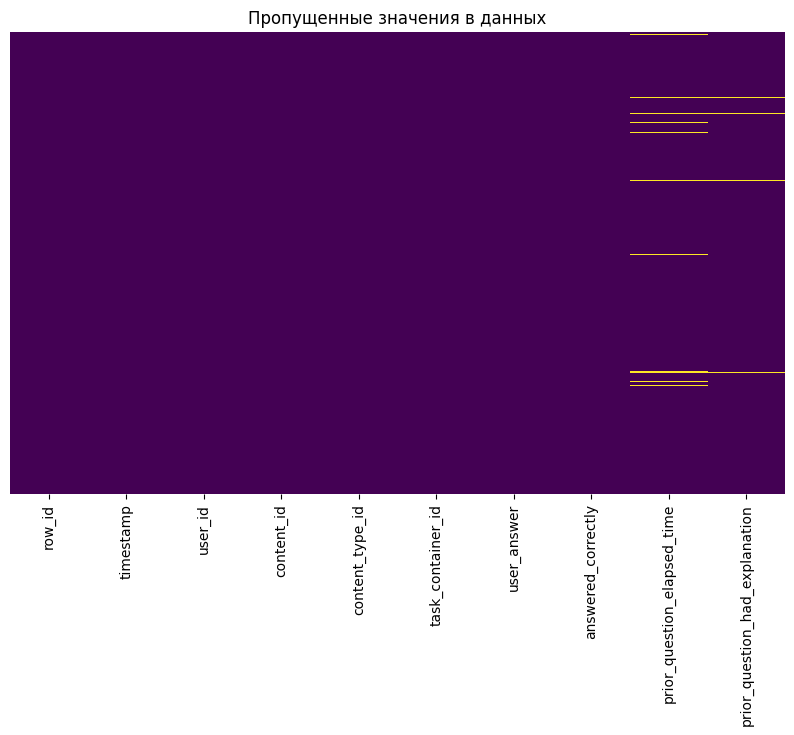

In [9]:
# Визуализация пропусков с помощью библиотеки seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Пропущенные значения в данных')
plt.show()

В связи с тем что у нас процент пропущенных данных < 4% в столбцах то можно, например, без потери целостности убрать пропущенные значения из датасета с помощью dropna() 

In [15]:
df_train = df_train.dropna()

## Шаг 3: Распределение переменных
На этом этапе важно проанализировать распределение каждой переменной, как числовой, так и категориальной.

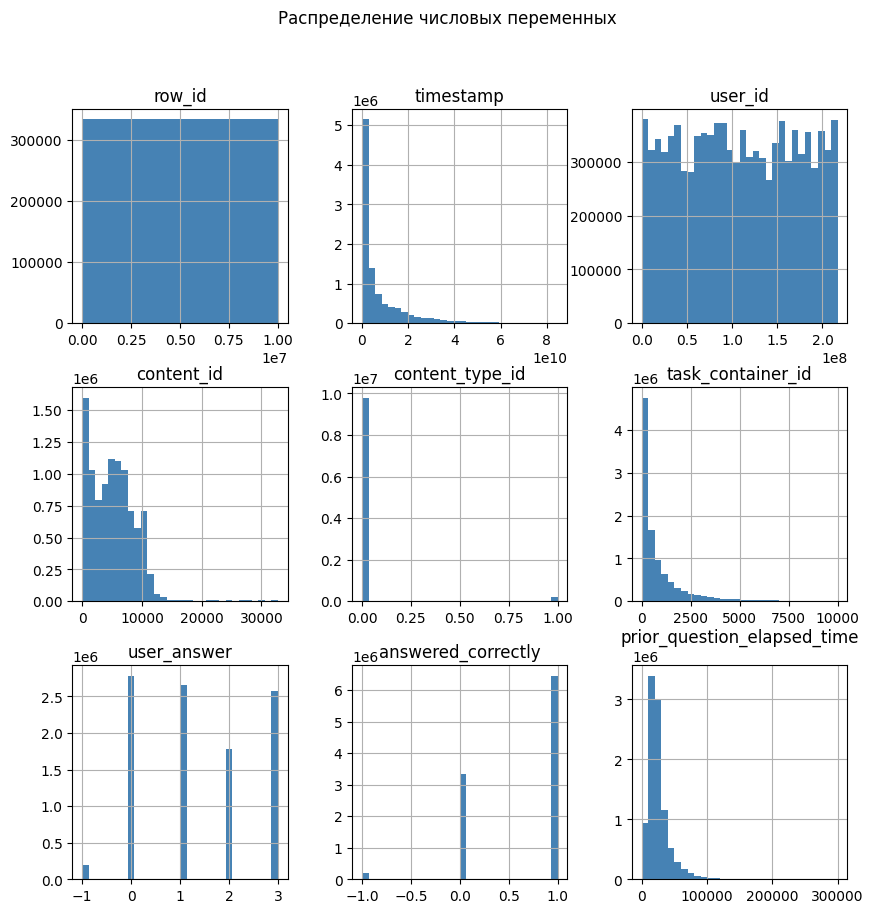

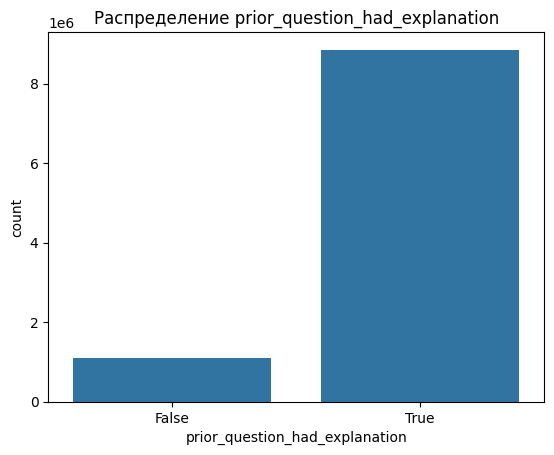

In [11]:
# Распределение числовых переменных
df_train.hist(bins=30, figsize=(10, 10), color='steelblue')
plt.suptitle('Распределение числовых переменных')
plt.show()

# Распределение категориальных переменных
for column in ['prior_question_had_explanation']:
    sns.countplot(x=column, data=df_train)
    plt.title(f'Распределение {column}')
    plt.show()

## Шаг 4: Анализ выбросов и аномалий
Выбросы можно выявить с помощью диаграмм размаха (boxplots).

`Способ 1`. Можно посмотреть на анализ выбросов в определенных переменных, указав их конкретно

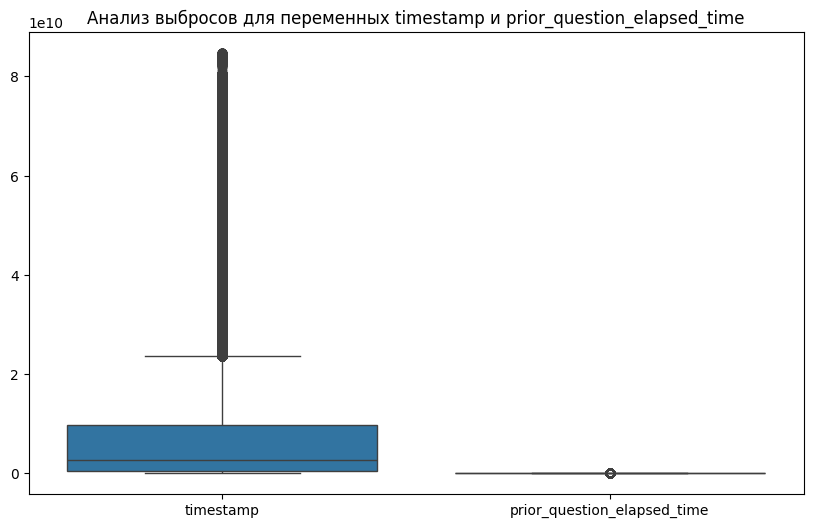

In [13]:
# Boxplot для выявления выбросов в переменных Age и Fare
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_train[['timestamp', 'prior_question_elapsed_time']])
plt.title('Анализ выбросов для переменных timestamp и prior_question_elapsed_time')
plt.show()


`Способ 2`. Можно посмотреть на анализ выбросов во всех числовых переменных следующим образом:

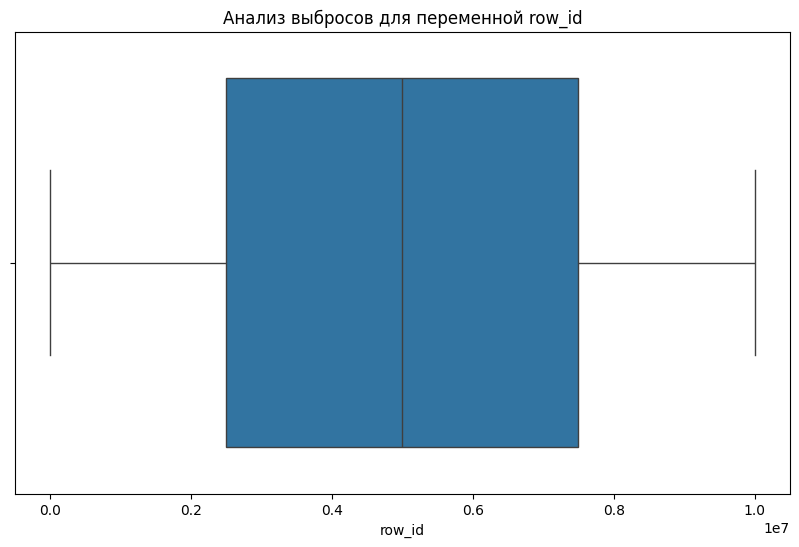

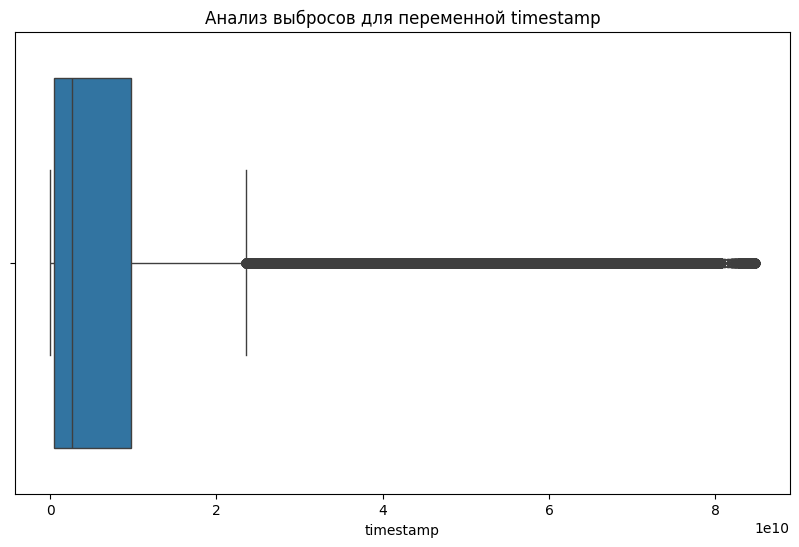

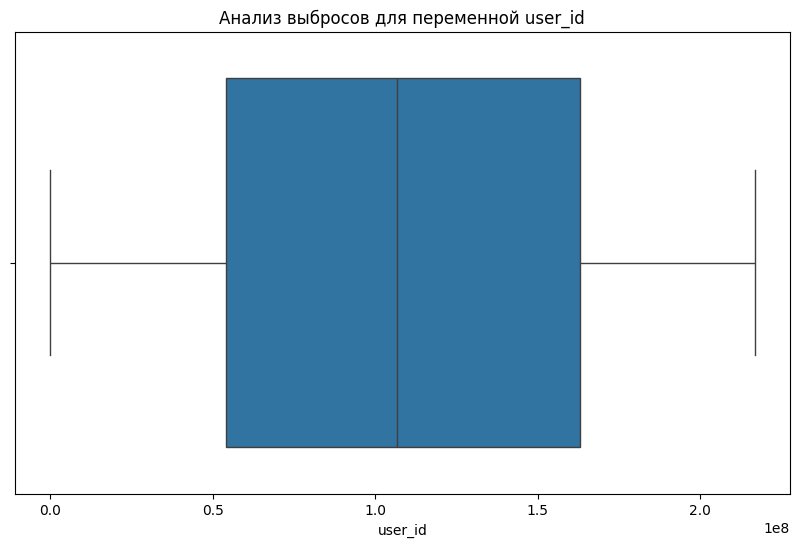

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_outliers(df):
    # Отбираем только числовые столбцы
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Построение boxplot для каждого числового столбца
    for column in numeric_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[column], orient='h')
        plt.title(f'Анализ выбросов для переменной {column}')
        plt.show()

# Анализ выбросов для всех числовых переменных
analyze_outliers(df_train)

переменная timestamp имеет большой масштаб, возможно для работы с ней понадобится прологарифмировать столбец чтобы уменьшить масштаб

## Шаг 5: Взаимосвязь между признаками

Чтобы понять, как признаки связаны между собой, строится корреляционная матрица. Это помогает выявить коррелирующие признаки, которые могут быть полезны для модели.

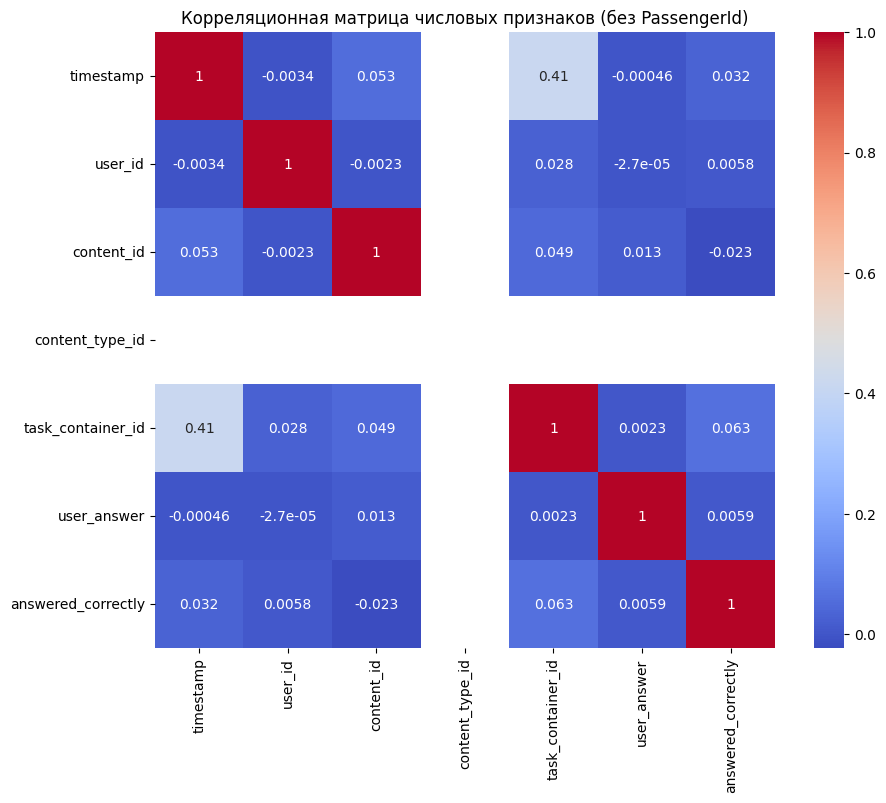

In [16]:
# Выбор только числовых признаков и удаление столбца PassengerId
numeric_cols = df_train.select_dtypes(include=['int64', 'float64','int8','int16']).drop(columns=['row_id'])

# Корреляционная матрица для числовых признаков
corr_matrix = numeric_cols.corr()

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков (без row_id)')
plt.show()

**Выводы по матрице корреляции**:
- на себя обращает внимание слабая корреляция параметров task_container_id и timestamp 


`Мультиколлинеарность` — это явление, при котором две или более независимые переменные (признаки) сильно коррелируют друг с другом. Это может стать проблемой для некоторых моделей машинного обучения, таких как линейная регрессия, потому что это приводит к снижению точности оценки коэффициентов.

**Как проверить мультиколлинеарность**
Корреляционная матрица: Если корреляция между двумя признаками близка к 1 или -1, это признак сильной коллинеарности. Однако это может быть недостаточно для полной проверки мультиколлинеарности, так как корреляционная матрица только проверяет линейные зависимости между двумя переменными.

`Коэффициент инфляции дисперсии (Variance Inflation Factor, VIF)`. VIF — это более продвинутый метод для проверки мультиколлинеарности. VIF оценивает, насколько сильно одна переменная зависит от других переменных.

Значение VIF > 5 или 10 указывает на потенциальную проблему мультиколлинеарности (это зависит от конкретного контекста задачи).

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Выбор только числовых признаков, исключая PassengerId и Survived (целевую переменную)
numeric_cols = df_train.select_dtypes(include=['int64', 'float64','int8','int16']).drop(columns=['row_id'])

# Удаление строк с пропусками
numeric_cols_cleaned = numeric_cols.dropna()

# Добавляем константу для вычисления VIF
X = sm.add_constant(numeric_cols_cleaned)

# Рассчитываем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Признак"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

c:\Users\itdept5\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\itdept5\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Признак,VIF
0,const,0.000000
1,timestamp,1.208654
2,user_id,1.001113
3,content_id,1.004594
4,content_type_id,NaN
5,task_container_id,1.212812
6,user_answer,1.000211
7,answered_correctly,1.004839


**Вывод по значениям VIF**:
VIF для всех признаков находится значительно ниже критического значения 5, что говорит о том, что мультиколлинеарность между признаками отсутствует или минимальна.


**Общие выводы**:
1. По результатам корреляционной матрицы и анализа VIF можно сделать вывод, что признаков с высокой мультиколлинеарностью нет, а переменные имеют слабую корреляцию между собой.
2. Признаки, такие как `timestamp` и `task_container_id`, могут оказаться важными для построения модели, так как они демонстрируют умеренные взаимосвязи друг с другом